In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

A partir del fichero del Titanic, realizar los siguiente:
a) Confeccione un gráfico de barras para visualizar hombres y mujeres que han sobrevivido

In [115]:
var_dataframe = pd.read_csv('titanic.csv')

var_statistics = var_dataframe.describe()

print(var_statistics)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [106]:
var_survived = var_dataframe.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

print(var_survived)

      Sex  Survived  Count
0  female         0     81
1  female         1    233
2    male         0    468
3    male         1    109


In [107]:
var_survived = var_survived[var_survived['Survived'] == 1]

print(var_survived)

      Sex  Survived  Count
1  female         1    233
3    male         1    109


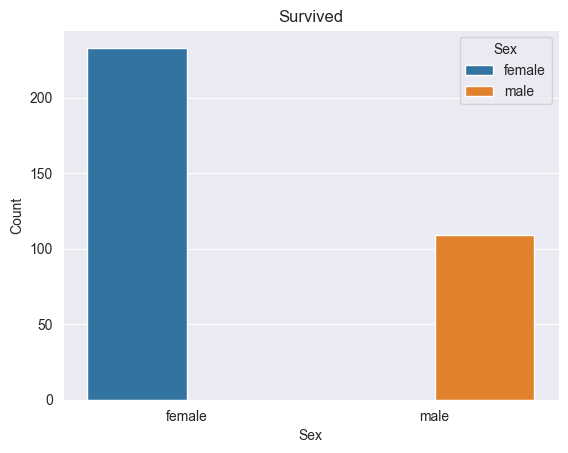

In [108]:
sns.barplot(x='Sex',y='Count',hue='Sex',data=var_survived)

plt.title('Survived')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

b) Cambiar el color del gráfico

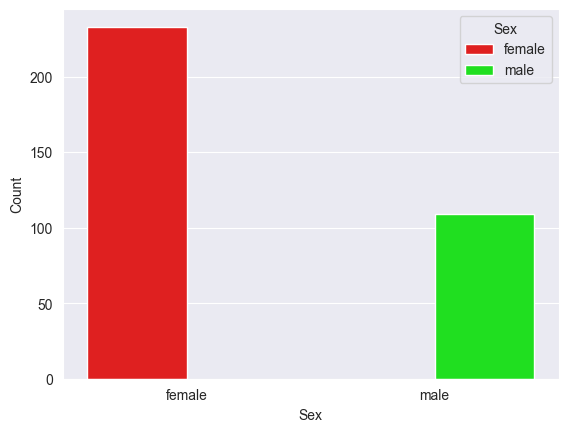

In [109]:
var_palette = ["#FF0000", "#00FF00", "#0000FF"]

sns.barplot(x='Sex',y='Count',hue='Sex',data=var_survived, palette=var_palette)

plt.show()

c) Gráfico barras agrupados

In [110]:
var_survived = var_dataframe.groupby(['Sex', 'Pclass', 'Survived']).size().reset_index(name='Count')

print(var_survived)

       Sex  Pclass  Survived  Count
0   female       1         0      3
1   female       1         1     91
2   female       2         0      6
3   female       2         1     70
4   female       3         0     72
5   female       3         1     72
6     male       1         0     77
7     male       1         1     45
8     male       2         0     91
9     male       2         1     17
10    male       3         0    300
11    male       3         1     47


In [111]:
var_survived = var_survived[var_survived['Survived'] == 1]

print(var_survived)

       Sex  Pclass  Survived  Count
1   female       1         1     91
3   female       2         1     70
5   female       3         1     72
7     male       1         1     45
9     male       2         1     17
11    male       3         1     47


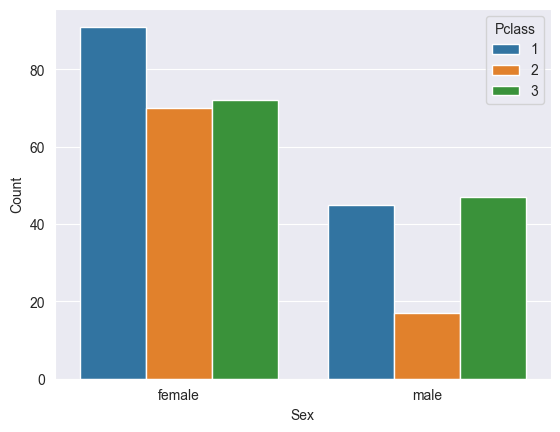

In [112]:
sns.barplot(x='Sex', y='Count', hue='Pclass', data=var_survived)

plt.show()

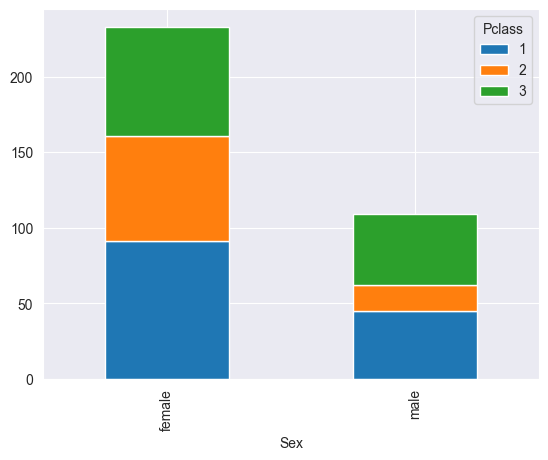

In [113]:
var_survived_counts = var_survived.pivot_table(index='Sex', columns='Pclass', values='Count', aggfunc='sum')

var_survived_counts.plot(kind='bar', stacked=True)

plt.show()